In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
from google.colab import files
uploaded = files.upload()

Saving titanic.csv to titanic.csv


In [3]:
# Read the uploaded file
df = pd.read_csv(next(iter(uploaded)))


In [13]:
# Display basic dataset info
print("Dataset Shape:", df.shape)
print("Number of Columns:", len(df.columns))
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())


Dataset Shape: (891, 12)
Number of Columns: 12

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.0000

In [5]:
# Check for null values
print("\nNull Values:")
print(df.isnull().sum())


Null Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [7]:

# Find unique values
print("\nUnique Values:")
print(df.nunique())

# Convert column names to remove leading/trailing spaces
df.columns = df.columns.str.strip()

# Drop non-numeric columns for analysis
numeric_cols = df.select_dtypes(include=['number']).columns
df_numeric = df[numeric_cols]

# Find number of missing values
missing_values = df.isnull().sum().sum()
print("\nTotal Missing Values:", missing_values)



Unique Values:
PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

Total Missing Values: 866


In [8]:
# Find number of people survived
num_survived = df['Survived'].sum()
print("\nNumber of People Survived:", num_survived)



Number of People Survived: 342


In [9]:
# Find number of male and female survivors
survived_gender = df[df['Survived'] == 1]['Sex'].value_counts()
print("\nNumber of Male and Female Survivors:")
print(survived_gender)


Number of Male and Female Survivors:
Sex
female    233
male      109
Name: count, dtype: int64


In [10]:
# Find average age of survivors
avg_age_survived = df[df['Survived'] == 1]['Age'].mean()
print("\nAverage Age of Survivors:", avg_age_survived)


Average Age of Survivors: 28.343689655172415


In [11]:
# Find minimum and maximum age of survivors
min_age_survived = df[df['Survived'] == 1]['Age'].min()
max_age_survived = df[df['Survived'] == 1]['Age'].max()
print("\nMinimum Age of Survivors:", min_age_survived)
print("Maximum Age of Survivors:", max_age_survived)



Minimum Age of Survivors: 0.42
Maximum Age of Survivors: 80.0


In [12]:
# Find survival with respect to class
survival_by_class = df.groupby('Pclass')['Survived'].sum()
print("\nSurvival by Class:")
print(survival_by_class)



Survival by Class:
Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64


In [18]:
# Handle missing values using imputation by mean of survived groups
avg_age_male = df[(df['Survived'] == 1) & (df['Sex'] == 'male')]['Age'].mean()
avg_age_female = df[(df['Survived'] == 1) & (df['Sex'] == 'female')]['Age'].mean()

# Use .loc for imputation, ensuring correct data type
df.loc[(df['Sex'] == 'male') & (df['Age'].isnull()), 'Age'] = avg_age_male
df.loc[(df['Sex'] == 'female') & (df['Age'].isnull()), 'Age'] = avg_age_female

# Fill missing 'Embarked' values with the mode (using .loc for safer modification)
df.loc[df['Embarked'].isnull(), 'Embarked'] = df['Embarked'].mode()[0]


In [19]:
# Convert categorical variables to numeric
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

In [20]:
# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [21]:
# Check for null values
print("\nNull Values:")
print(df.isnull().sum())



Null Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked_Q       0
Embarked_S       0
dtype: int64


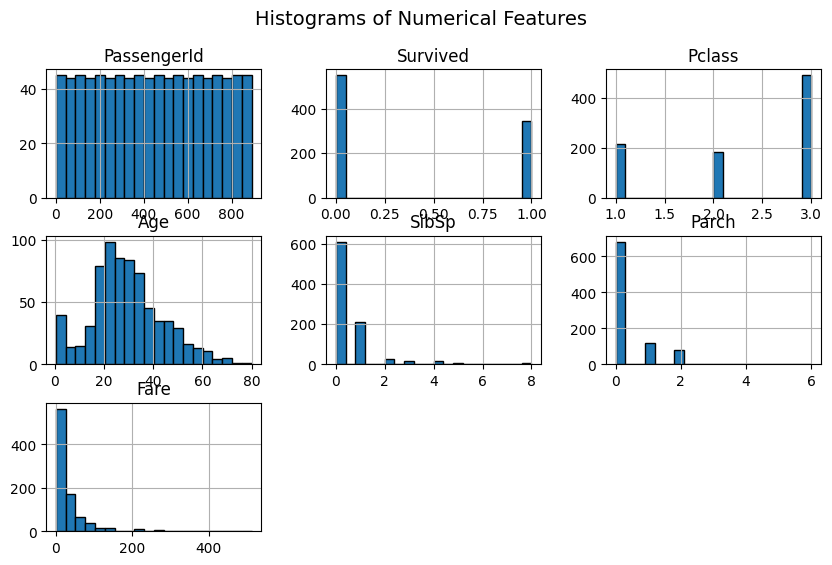

In [23]:
# Plot histograms
df_numeric.hist(figsize=(10, 6), bins=20, edgecolor="black")
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()


<ipython-input-24-fca753e02a3a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
<ipython-input-24-fca753e02a3a>:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")


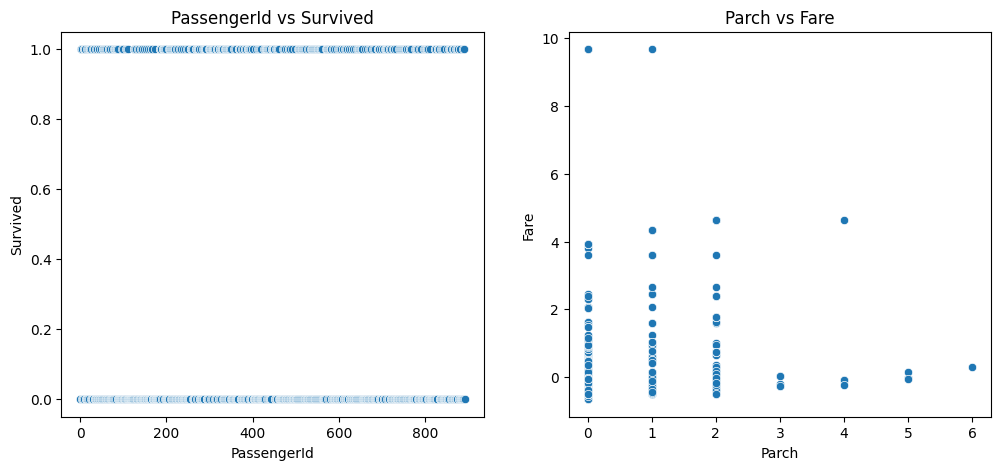

In [24]:
# Scatterplots
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x=numeric_cols[0], y=numeric_cols[1], palette="viridis")
plt.title(f"{numeric_cols[0]} vs {numeric_cols[1]}")

plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x=numeric_cols[-2], y=numeric_cols[-1], palette="coolwarm")
plt.title(f"{numeric_cols[-2]} vs {numeric_cols[-1]}")
plt.show()


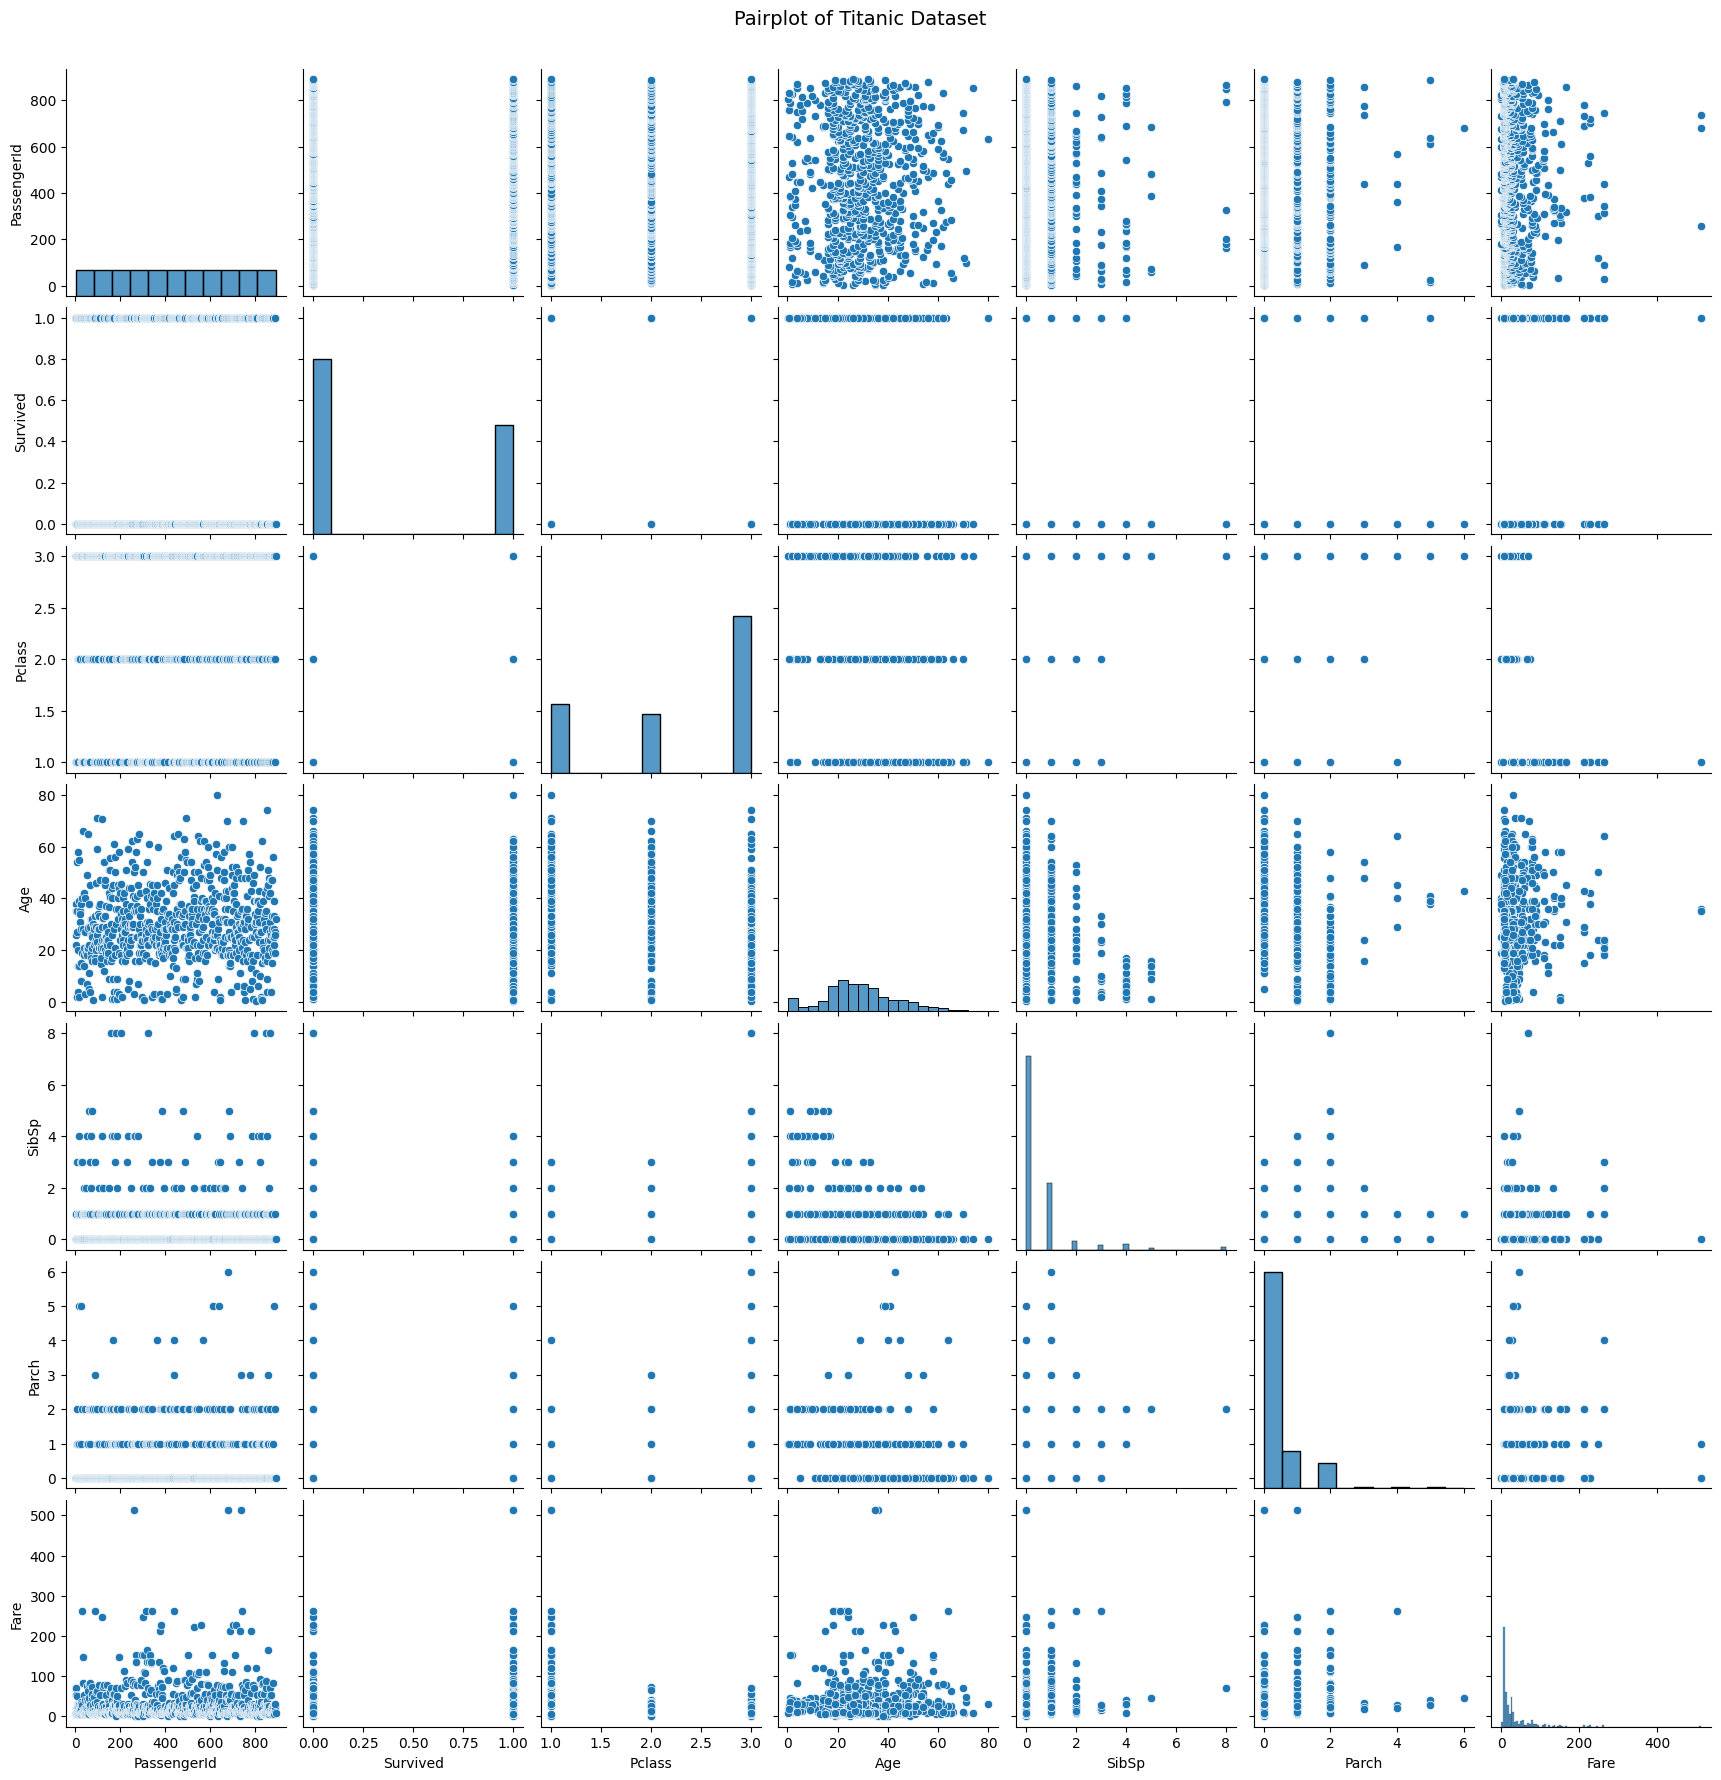

In [25]:
# Pairplot
sns.pairplot(df_numeric)
plt.suptitle("Pairplot of Titanic Dataset", fontsize=14, y=1.02)
plt.show()

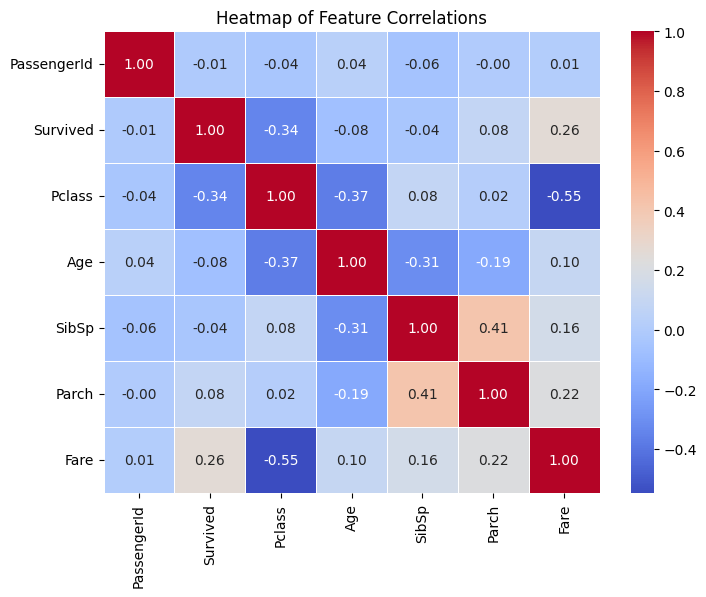

In [26]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Heatmap of Feature Correlations")
plt.show()


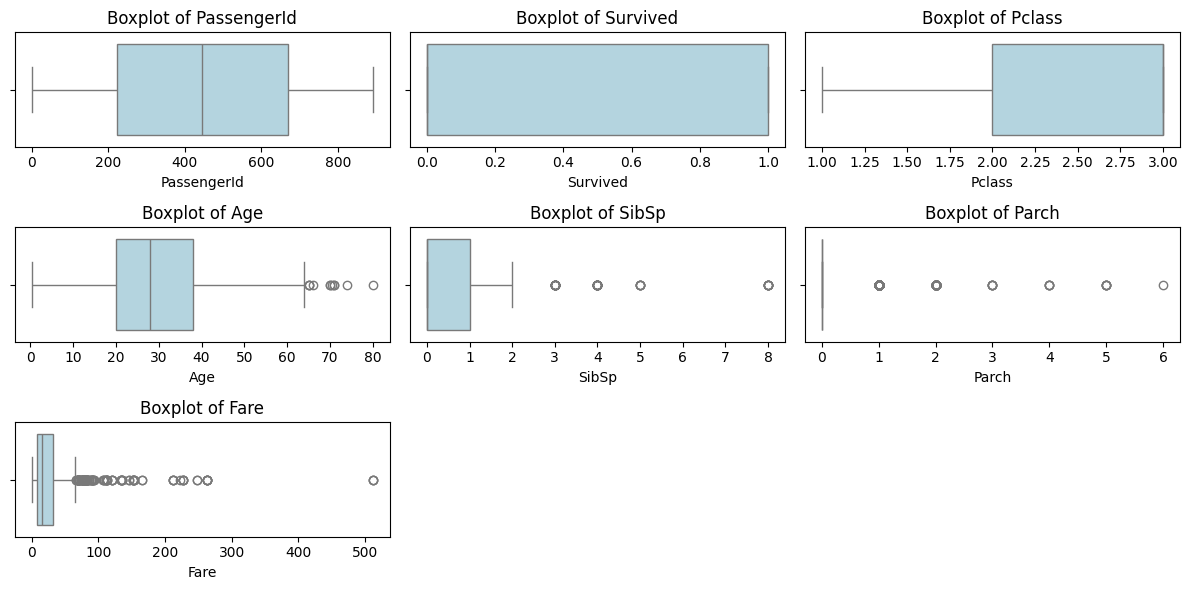

In [28]:
# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
# Adjust subplot layout to accommodate 7 features in 3 rows, 3 columns
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(3, 3, i)  # Changed from (2, 3, i) to (3, 3, i)
    sns.boxplot(x=df_numeric[col], color="lightblue")
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

In [29]:
# Handling Outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]


In [30]:
# Apply outlier removal
df_cleaned = df_numeric.copy()
for col in df_numeric.columns:
    df_cleaned = remove_outliers(df_cleaned, col)

# Display shape before and after outlier removal
print("\nOriginal Shape:", df.shape)
print("Cleaned Shape:", df_cleaned.shape)



Original Shape: (891, 13)
Cleaned Shape: (436, 7)
